In [1]:
#Import datasets
import pandas as pd 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.feature_selection import SelectKBest

In [7]:
#read_csv into file
df = pd.read_csv('full_features.csv')

#Convert Date column into datetime
df['Date'] = pd.to_datetime(df['Date'])

#Convert Date to year, month, day columns 

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df = df.drop(['Date'], axis=1)

#One-hot-encode color column
color_dummies = pd.get_dummies(df['color'], prefix='color')
# Concatenate the one hot encoded columns to the original dataframe
df = pd.concat([df, color_dummies], axis=1)
# Drop the original color column
df.drop(['color'], axis=1, inplace=True)

#One-hot-encode variety_desc column
variety_dummies = pd.get_dummies(df['variety_desc'])
# Concatenate the one hot encoded columns to the original dataframe
df = pd.concat([df, variety_dummies], axis=1)

#Convert all negative 'ages' to NANs 
df['age'] = df['age'].mask(df['age'] < 0, np.nan)

df = df.drop(['var_boxes', 'ranch_sub', 'prod_yr', 'yield', 'variety_desc', 'ranch_no',  'var_cd', 'grafted'], axis = 1)

df = df.dropna(axis=0)

df

,acres,year_planted_grafted,age,yield_class,Daily_High,Daily _Low,Precipitation,year,month,day,...,EXPERIMENTAL 80B-30+9,EXPERIMENTAL 95B-59+6,FLAME SEEDLESS,IVORY - SHEEGENE 21,RED GLOBE,SCARLET ROYAL,SUGRAONE,SWEET GLOBE,SWEET SCARLET,THOMPSON SEEDLESS
0,36.00,2009,6.0,high,94,68,0.0,2015,7,13,...,0,0,0,0,0,0,0,0,0,0
3,88.00,2006,9.0,high,94,68,0.0,2015,7,13,...,0,0,0,0,0,0,1,0,0,0
4,37.40,2011,4.0,high,94,68,0.0,2015,7,13,...,0,0,1,0,0,0,0,0,0,0
7,164.00,2011,4.0,high,94,68,0.0,2015,7,13,...,0,0,0,0,0,0,1,0,0,0
8,76.00,2012,3.0,high,94,68,0.0,2015,7,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3631,289.60,2010,8.0,high,74,39,0.0,2018,11,12,...,0,0,0,0,0,0,0,0,0,0
3632,572.40,2012,6.0,low,74,39,0.0,2018,11,12,...,0,0,0,0,0,0,0,0,0,0
3633,69.35,2017,1.0,low,74,39,0.0,2018,11,12,...,0,0,0,0,0,0,0,0,0,0
3634,63.00,2009,10.0,high,93,65,0.0,2019,7,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Drop unneccessary columns and rows with NAN and infinity values
#This set has NEITHER var_boxes or acres

#drop yield_class from dataset
X = df.drop('yield_class', axis=1)
y = df['yield_class']


# Define the pipeline
pipeline = Pipeline([
    ('replace_inf', SimpleImputer(strategy='median', missing_values=np.inf)),
    ('replace_nan', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scale_data', StandardScaler()),
    ('clf', GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier using the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)


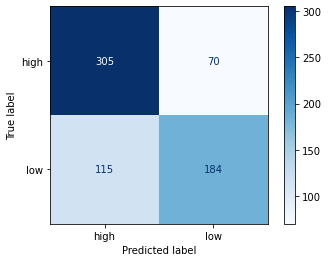

In [19]:
plot_confusion_matrix(pipeline, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [20]:
X = df.drop('yield_class', axis=1)
y = df['yield_class']

# Evaluate model using 5-fold cross-validation
scores = cross_val_score(pipeline, X, y, cv=5)

# Print average performance across all folds
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.69 (+/- 0.06)
